In [ ]:
# Previsão de Séries Temporais (ARIMA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
 #pip install pmdarima
from pmdarima.arima import auto_arima

In [6]:
#conversão dos atributos que estão no formato string para o formato ano-mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [7]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


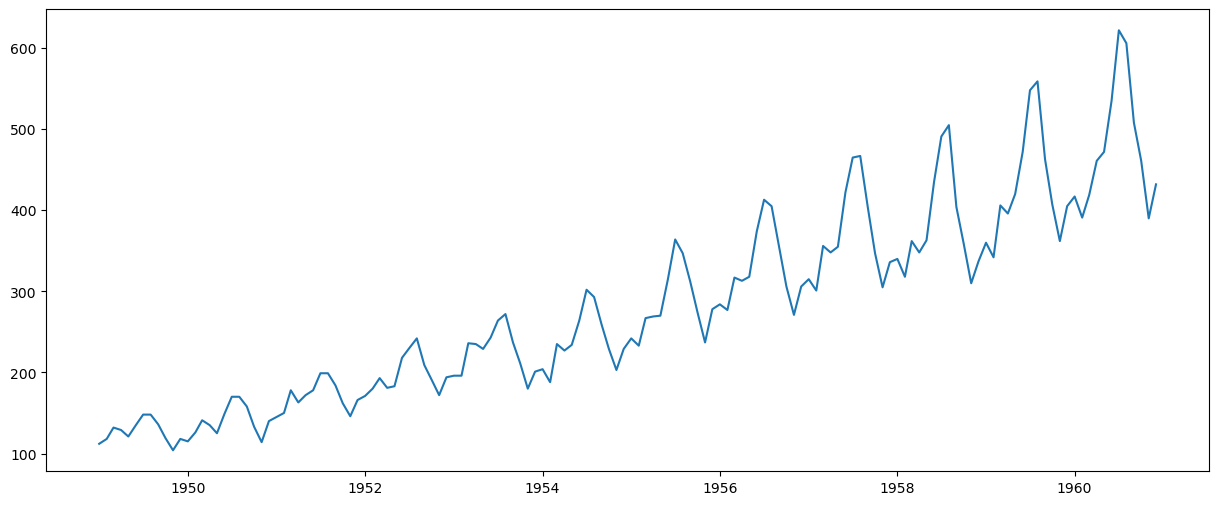

In [8]:
plt.plot(data)

In [9]:
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

NameError: name 'auto_arima' is not defined

In [3]:
#1019.1780567487502
print(stepwise_model.aic())

NameError: name 'stepwise_model' is not defined

In [63]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [64]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [65]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [66]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [67]:
future_forecast = stepwise_model.predict(n_periods=12)

In [68]:
future_forecast

array([420.23088261, 398.44472728, 461.89582337, 450.67723081,
       473.99091884, 537.91498794, 612.22858157, 623.58000933,
       520.15717003, 462.30571444, 412.91498134, 453.73420286])

In [69]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<AxesSubplot:xlabel='Month'>

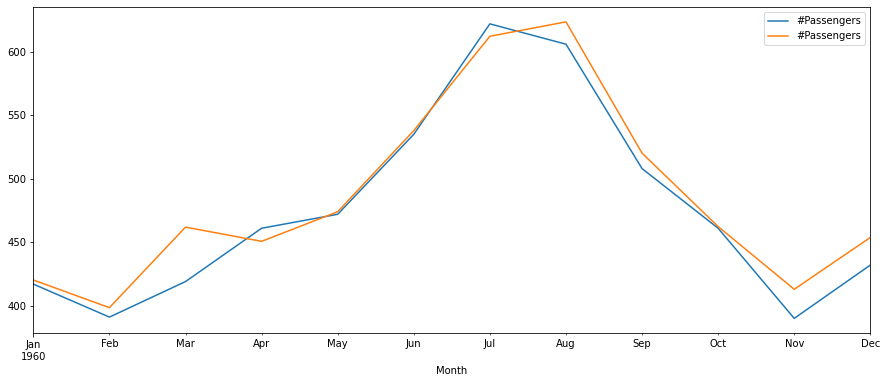

In [70]:
#azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='Month'>

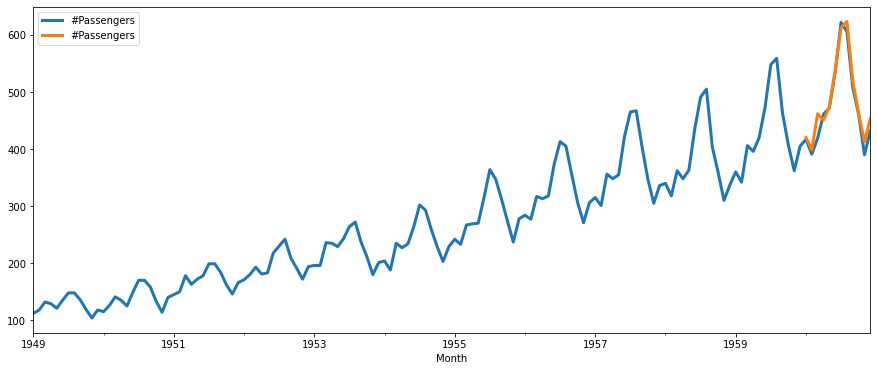

In [71]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)